##Quantitative Tests of Normalitiy Using The Anderson-Darling Statistic


In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import math as math

### Anderson-Darling
The Anderson-Darling statistical test is based on the quadradic empirical distribution function. The test statistic is an estimate of the distance between the normal cumulative distribution function (CDF) and the empirical (sample) distribution function. The distance is the integral over the real line of the weighted squared distance between the two CFSs and the integral is with respect to the hypothesized CDF.

The distance can be estimated by a sum over the samples using the assumtion that the frequency of the data follows a Uniform distribution. 

The function below calculates this estimate.

In [3]:
def my_anderson_darling(x):
    n = len(x)
    ys = np.sort(x)  # sort the data from low to high
    y = (ys - np.mean(x))/np.std(x)  # standardize the data
    S = 0  # accumulate 
    for i in range(1, n+1):
        t1 = math.log(stats.norm.cdf(y[i-1]))
        t2 = math.log(1 - stats.norm.cdf(y[n-i]))
        S += (2*i-1) * (t1 + t2)
    a2 = -n - S/n
    return a2

In [4]:
np.random.seed(12345)
mu = 0.0  # mean
sigma = 2.0  # standard deviation
x_from_normal = np.random.normal(mu, sigma, 100)  # generate an array of random numbers 
my_anderson_darling(x_from_normal)  # compute the statistic on the normal data

0.2970629092494761

###Scipy's Anderson-Darling

scipy contains an efficient version of Anderson-Darling and it also computes a table of the critical values and significance levels of the statistic.

The example below calculates the statistic on our normal data and then displays a table of critical values and significance levels.

In [5]:
ar = stats.anderson(x_from_normal, 'norm')  # use scipy's anderson-darling test for a normal distribution
print('Anderson-Darling statistic:', ar.statistic)
pd.DataFrame({'critical value': ar.critical_values, 'significance': ar.significance_level})

Anderson-Darling statistic: 0.299393489776


,critical value,significance
0,0.555,15.0
1,0.632,10.0
2,0.759,5.0
3,0.885,2.5
4,1.053,1.0


### Testing Anderson-Darling On Normal Data
In the following experiment we will test the statistic computed by the Anderson-Darling function on normal data. We will generate many normal data sets and count the number of times the Anderson-Darling statistic rejects the normality of the data. This rejection rate should match the significance of the test at a specific critical value. The critical values and levels of significance are as show in the table above.

In [6]:
def test_anderson_darling_on_normal(n_set, n_sample):
    ar_stats = np.zeros(n_set)  # hold the anderson-darling statistics here
    for i in range(n_set):
        x = np.random.normal(0, 1, n_sample)  # generate a set of normal random numbers
        ad = stats.anderson(x, 'norm')  # compute the statistic on the set
        ar_stats[i] = ad.statistic
    return ar_stats, ad.critical_values, ad.significance_level

In [7]:
np.random.seed(123456)
ar_stats, critical_vals, sig_levels = test_anderson_darling_on_normal(1000, 1000)
rejection_rate = np.zeros(len(ar.critical_values))
for i in range(len(ar.critical_values)):
    rejection_rate[i] = sum(ar_stats > ar.critical_values[i]) / len(ar_stats) * 100
pd.DataFrame({'critical value': critical_vals, 'significance': sig_levels, 'rejection rate': rejection_rate})

,critical value,rejection rate,significance
0,0.574,15.9,15.0
1,0.653,11.1,10.0
2,0.784,5.4,5.0
3,0.914,2.8,2.5
4,1.088,1.4,1.0


###Anderson-Darling Test with Non-normal Data
We will generate data from three other non-normal distributions and compute the Anderson-Darling statistic on these data sets. The computed statistics show that the normal distribution is an unlikely hypothesis for the other distributions.

In [8]:
n_sample = 1000
mu = 0
sigma = 1
y1 = np.random.normal(mu, sigma, n_sample)
y2 = np.random.laplace(mu, sigma, n_sample)
y3 = np.random.standard_cauchy(n_sample)
y4 = np.random.lognormal(mu, sigma, n_sample)

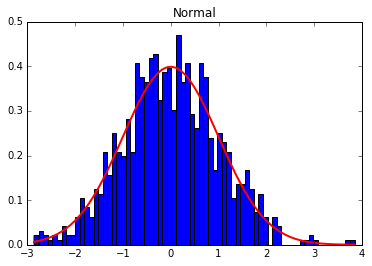

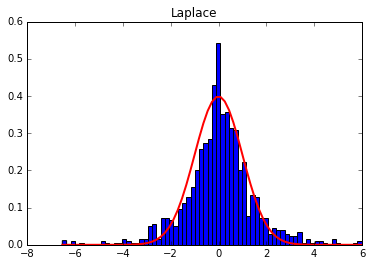

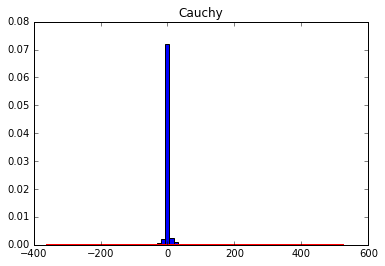

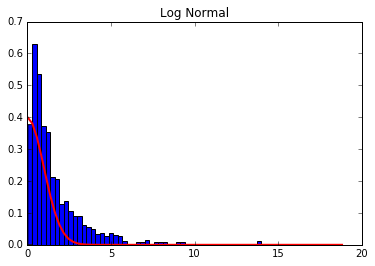

In [9]:
def plot_norm_histogram(x, mu, sigma, plot_title=''):
    count, bins, ignored = plt.hist(x, 70, normed=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
             np.exp(- (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
    plt.title(plot_title)
    plt.show()
plot_norm_histogram(y1, mu, sigma, 'Normal')
plot_norm_histogram(y2, mu, sigma, 'Laplace')
plot_norm_histogram(y3, mu, sigma, 'Cauchy')
plot_norm_histogram(y4, mu, sigma, 'Log Normal')

In [10]:
ad_y1 = stats.anderson(y1, 'norm')
ad_y2 = stats.anderson(y2, 'norm')
ad_y3 = stats.anderson(y3, 'norm')
ad_y4 = stats.anderson(y4, 'norm')

In [10]:
pd.DataFrame({'distribution': ['normal', 'laplace', 'cauchy', 'lognormal'], 
              'statistic': [ad_y1.statistic, ad_y2.statistic, ad_y3.statistic, ad_y4.statistic],
              'mean': [np.mean(y1), np.mean(y2), np.mean(y3), np.mean(y4)]})

,distribution,mean,statistic
0,normal,0.000673,0.275203
1,laplace,0.015262,12.031342
2,cauchy,0.890131,inf
3,lognormal,1.728999,inf
